<a href="https://colab.research.google.com/github/yucachen/MLTSA25_YChen/blob/main/In_Class_Code/Class_4_10_2025_timeSeriesClustering_populationexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis on population trends

You are clustering the "shape" of time series to find trends, specifically, population growth trends. Do any countries stand out in the population growth trends in the past 60 years? are there groups of countries that have similar trends (and why?)

NOTE: your clusters may not be identical to mine!
## Imports

In [1]:
import pandas as pd
import pylab as pl
import numpy as np

from sklearn import preprocessing
from sklearn import cluster

pl.rcParams['font.size'] = 12

do this to read an excel file with python
then restart the notebook

In [2]:
#need this to read the excell file with pandas
!pip install xlrd==2.0.1

# Data processing

## Get the data

I wanted the data to be gotten from the WorldBank API directly but the link is down tonight (11/2) so I put the file on the shared drive. Mount your google drive and get it from `/content/drive/Shareddrives/PUS2022/data`. The file name is `SP.POP.TOTL?downloadformat=excel`

You are going to have to skip some rows (`skiprows=`) and ideally only use relevant columns (the country name and each year column from 1960, you can use `usecold=` or you can read everything in then throw away the columns you do not need).

Finally, set the country name as the index for this dataframe. you can do that with `set_index()` passing the relevant column name as the argument (dont forget that you want to do it inplace! `inplace=True`)

In [3]:
#reading in the data
pop_df = pd.read_excel('https://github.com/fedhere/MLTSA_FBianco/raw/refs/heads/main/data/SP.POP.TOTL_downloadformat=excel', skiprows=3)
columns = ['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']
pop_df = pop_df[columns]
pop_df.set_index("Country Name", inplace=True)
pop_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN
"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,6097035.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN
South Africa,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,21496075.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN


##Data Cleaning
remove NaNs, remove any unwanted columns

<Axes: >

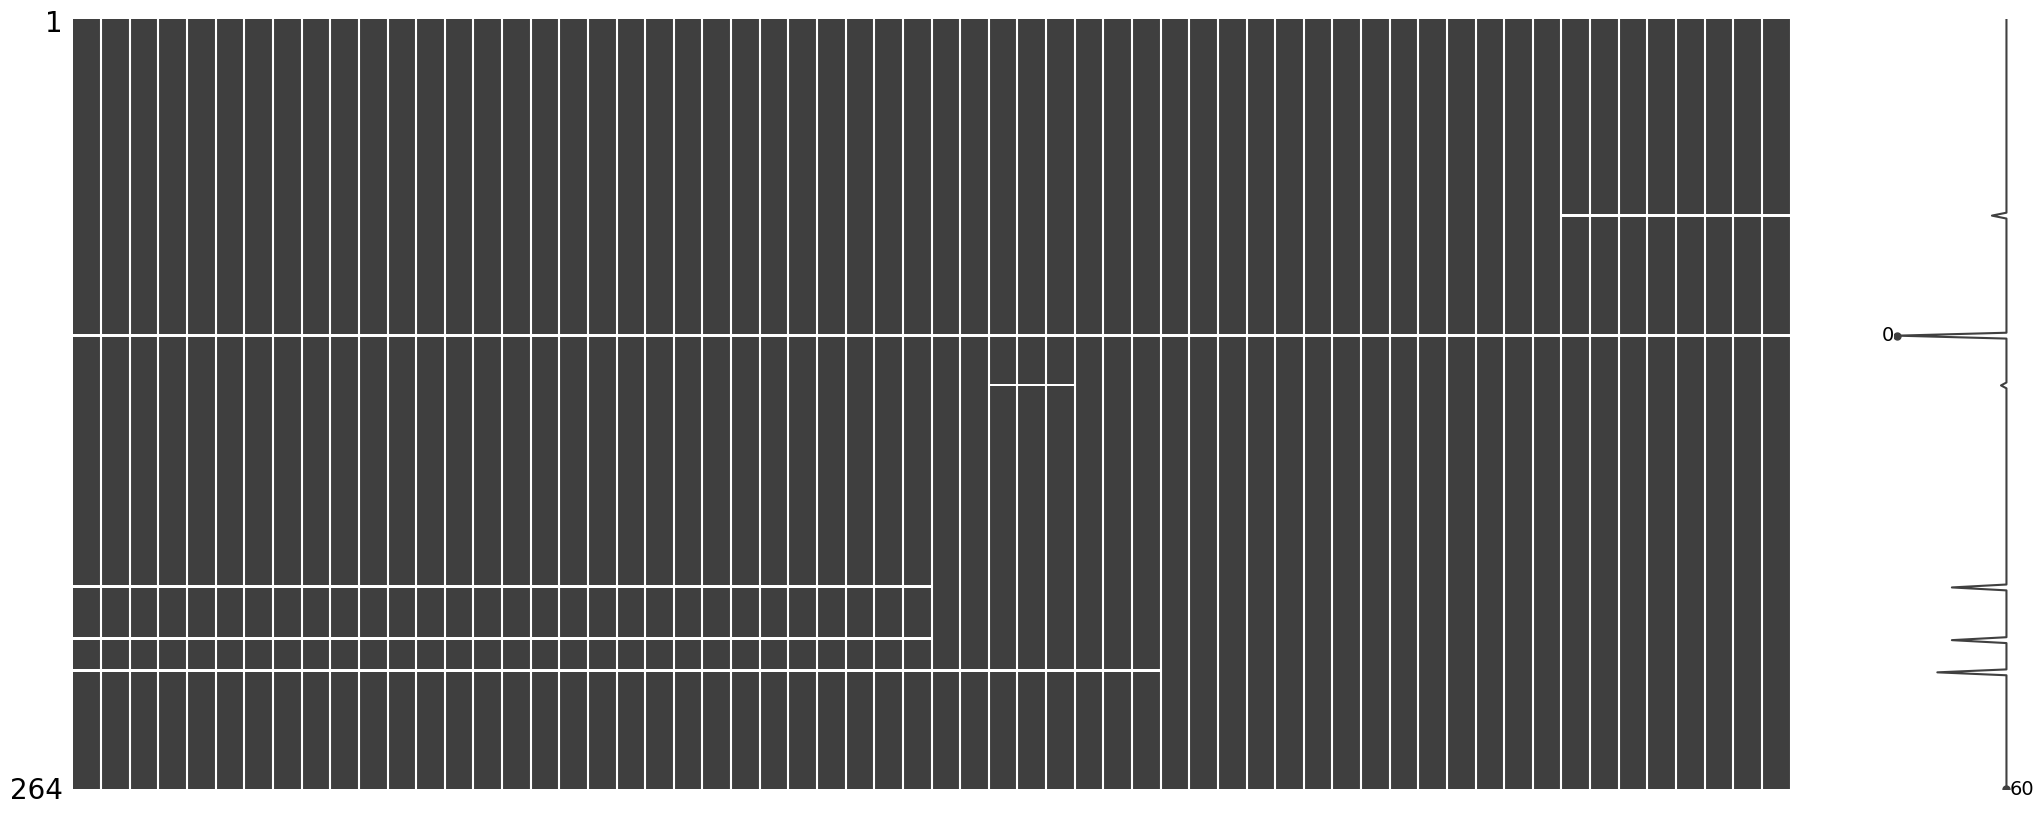

In [4]:
import missingno as mno
mno.matrix(pop_df)

In [5]:
pop_df.loc[pop_df.isnull().sum(axis=1) > 20]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,NaN
Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7020858.0,6982604.0,6944975.0,NaN
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33435.0,34640.0,36607.0,37685.0,38825.0,39969.0,40574.0,40654.0,40733.0,NaN


In [6]:
# I recommend you drop any column that is all NaN and any row that has any NaN
# you control this (dropping only if all are, vs dropping if any is) with the keyord "any" of .dropna()
pop_df_clean = pop_df.dropna(axis=1, how="all")
pop_df_clean = pop_df_clean.dropna(axis=0, how="all")
pop_df_clean.shape


(263, 60)

In [12]:
# checking to see whether or not the NaN values are removed from pop_df_clean
pop_df_clean.loc[pop_df.isnull().sum(axis=1) > 20]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,


In [14]:
pop_df_clean.dropna(axis=0, how="any", inplace=True)
pop_df_clean.shape
pop_df_clean.loc[pop_df.isnull().sum(axis=1) > 20]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,


In [15]:
# looking a little at the data
print (f"In the cleaning process we lost {np.array(pop_df.shape) - np.array(pop_df_clean.shape)} (rows, columns)")
print ("In the cleaning process we lost  {:.2f}% of the data".format(
    100* (np.prod(np.array(pop_df.shape) - np.array(pop_df_clean.shape)) / np.prod(pop_df.shape))))

In the cleaning process we lost [6 1] (rows, columns)
In the cleaning process we lost  0.04% of the data


<Axes: >

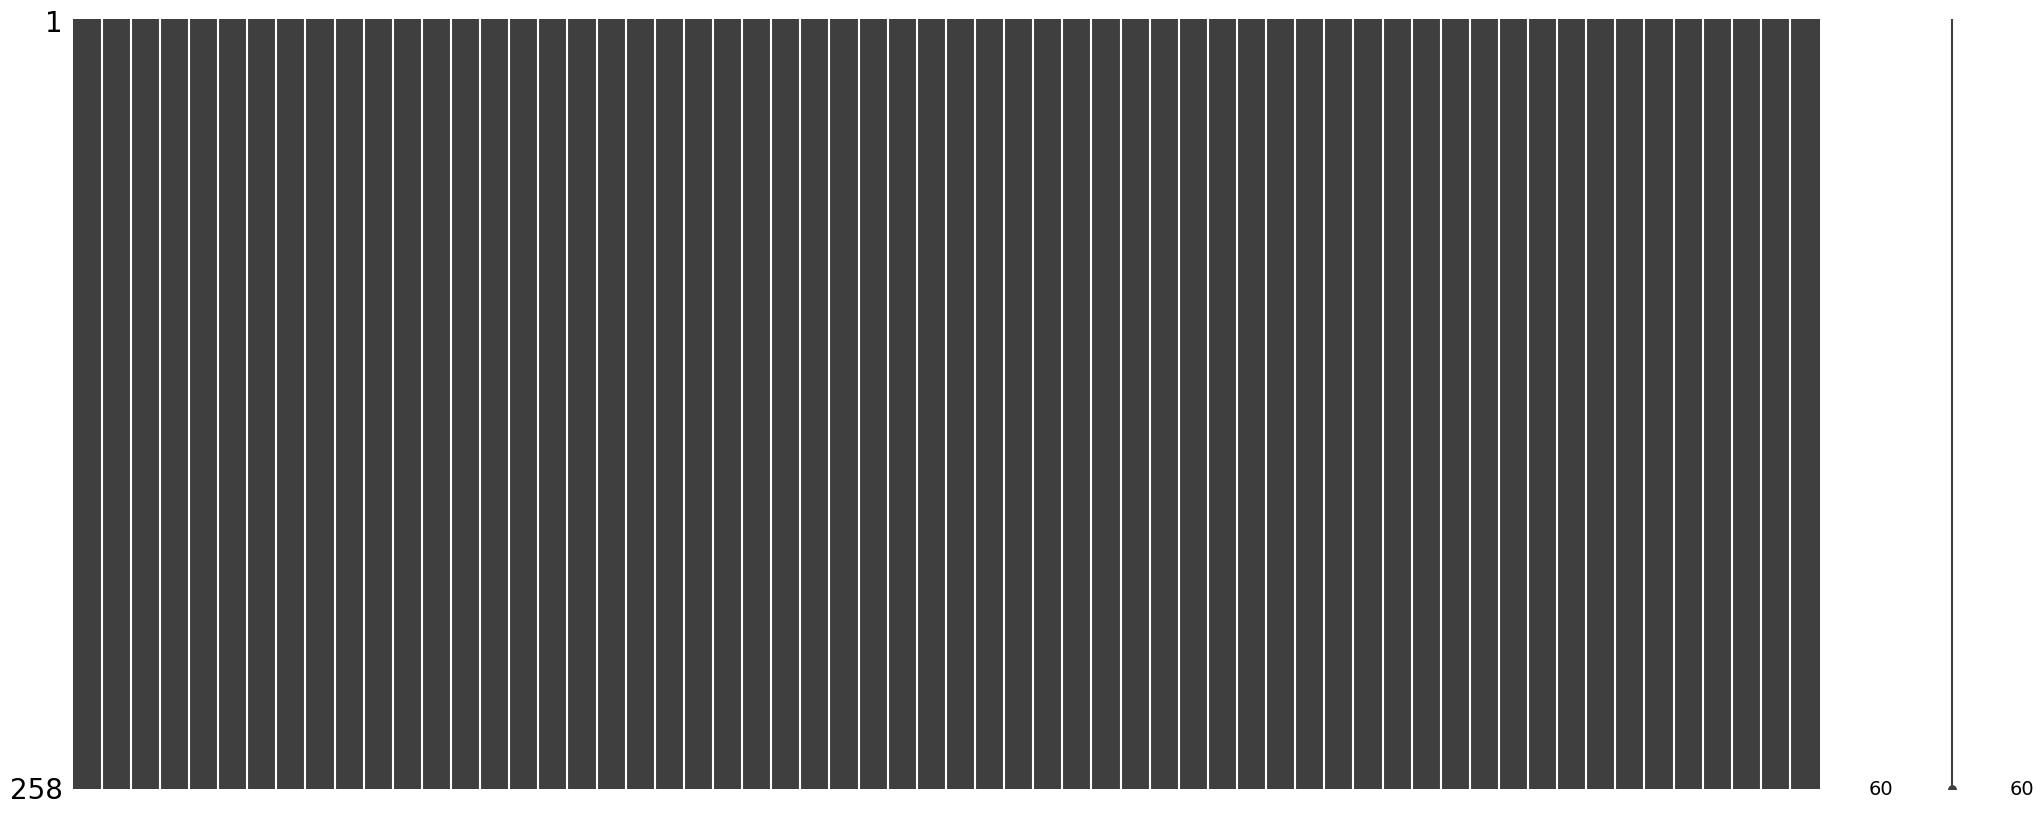

In [16]:
mno.matrix(pop_df_clean)

# consider improving this! can you fill nan values with interpolation or nearest neighbours? what are the pros and cons of each choice?

In [17]:
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [18]:
pop_df_clean.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,6097035.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
South Africa,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,21496075.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
Zambia,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,4045740.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0
Zimbabwe,3776681.0,3905034.0,4039201.0,4178726.0,4322861.0,4471177.0,4623351.0,4779827.0,4941906.0,5111337.0,...,12697723.0,12894316.0,13115131.0,13350356.0,13586681.0,13814629.0,14030390.0,14236745.0,14439018.0,14645468.0


Text(0.5, 1.0, 'Original data')

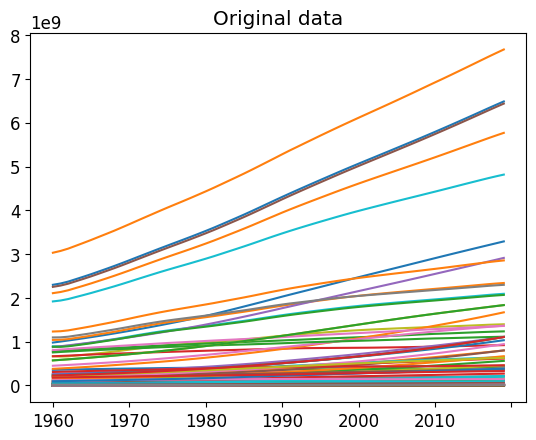

In [19]:
ax = pop_df_clean.T.plot(legend=False);
ax.set_title("Original data")

Figure 1: the time series of population over time for 258 countries. Clearly the overall population size dominates the difference. General growth trends are still obvious

In [20]:
# prompt: cluster the time series in pop_clean with kmeans into 3 clusters

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pop_df_clean)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Set random_state for reproducibility
kmeans.fit(pop_df_clean)

# Add cluster labels to the DataFrame
pop_df_clean['cluster'] = kmeans.labels_

pop_df_clean.head()


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,cluster
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,0


<Axes: >

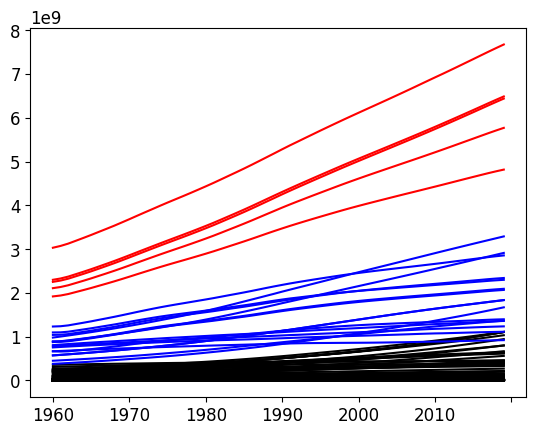

In [21]:
ax = pop_df_clean[pop_df_clean.cluster == 0].drop("cluster", axis=1).T.plot(legend=False, color="k")
pop_df_clean[pop_df_clean.cluster == 1].drop("cluster", axis=1).T.plot(ax=ax, legend=False, color="r")
pop_df_clean[pop_df_clean.cluster == 2].drop("cluster", axis=1).T.plot(ax=ax, legend=False, color="b")


20it [00:00, 48.60it/s]


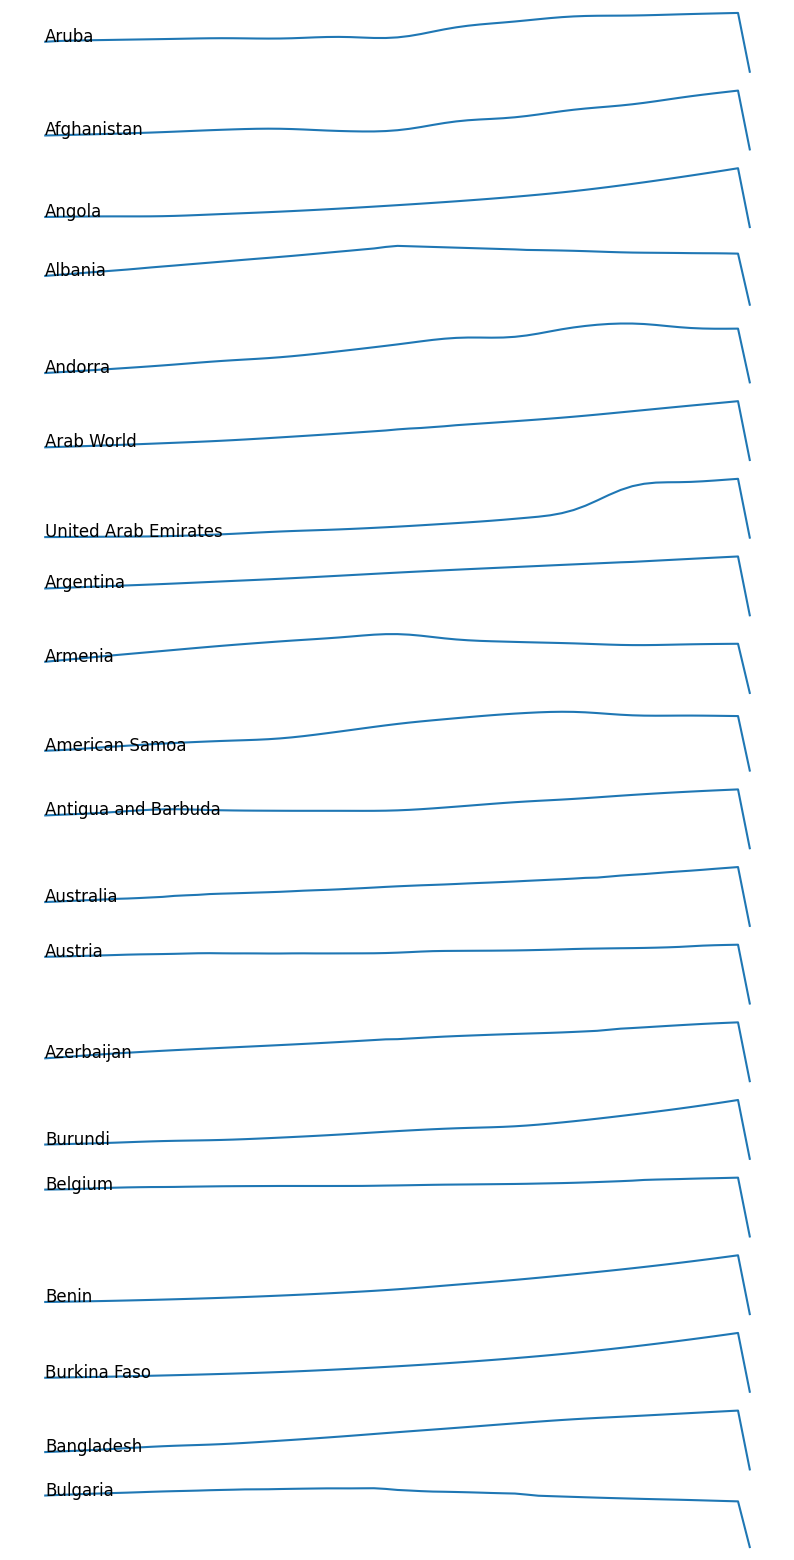

In [23]:
import matplotlib.pylab as plt
from tqdm import tqdm
fig, ax = plt.subplots(20, 1, figsize=(10,20))
for i,idx in tqdm(enumerate(pop_df_clean.index[:20])):
   pop_df_clean.loc[idx].T.plot(ax=ax[i])
   ax[i].axis('off')
   ax[i].text(0, pop_df_clean.loc[idx, "1960"], idx)

# sharp drop off because the last point is plotting the "cluster" column oops

Figure 2: the first 30 time series in the collection shown in Figure 2, with mute axis so as to display the trend difference rather than the overall normalization. Genral growth trends are obvious but specific trends are also obvious: e.g. Bulgaria Armania and Albania have a population drop while most country have a steady increas. Clustering without normalizing did not capture this and used the mean to cluster

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
20it [00:00, 41.14it/s]


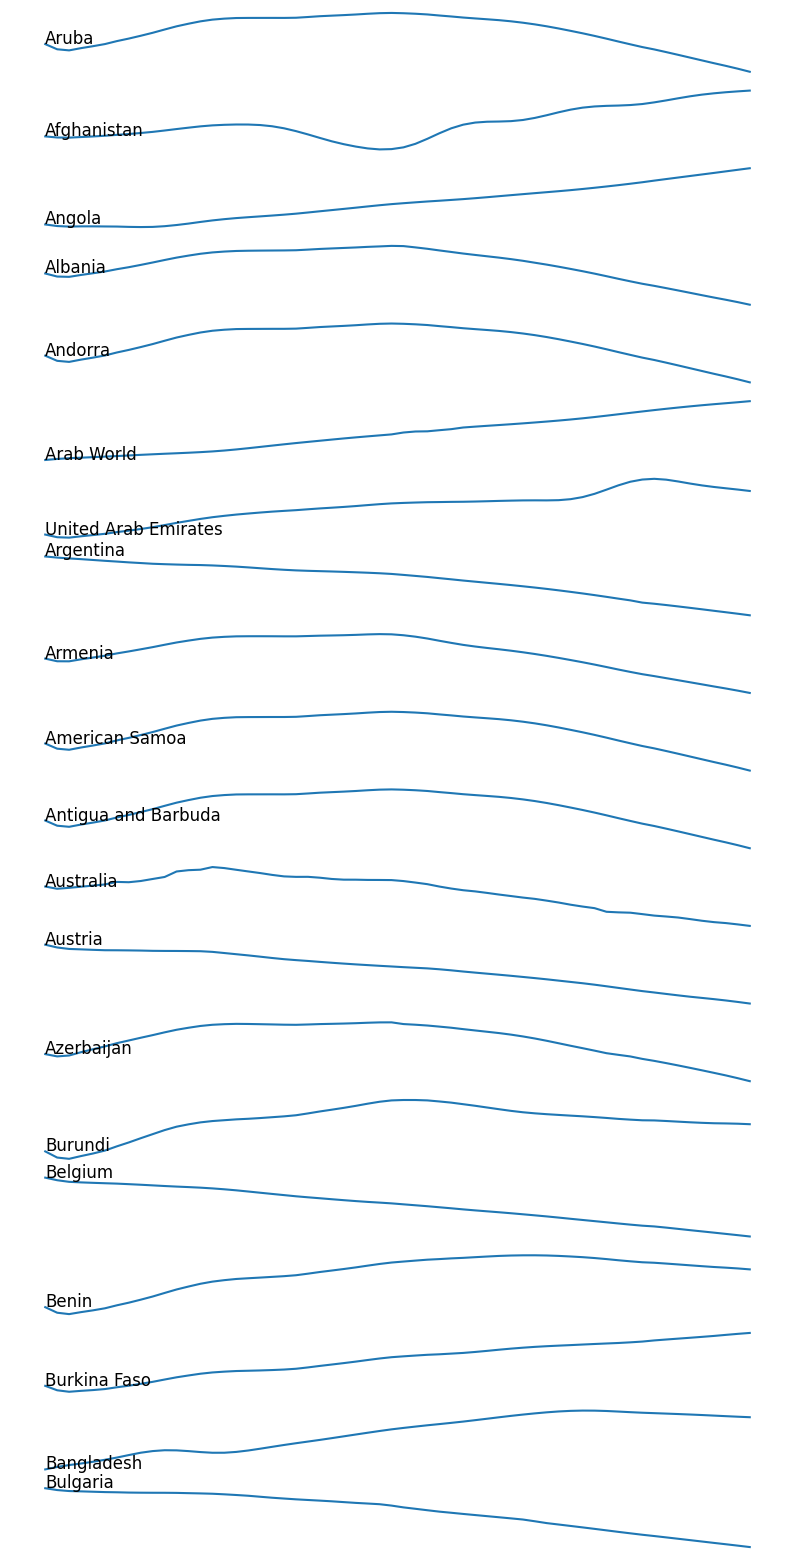

In [24]:

## Scale the data# standardizing the data
X= pop_df_clean.drop("cluster", axis=1).values
scaled_data = preprocessing.scale(X, axis=0, with_mean = True, with_std = True)

pod_standardized_bycol = pd.DataFrame(data=scaled_data, index = pop_df_clean.index, columns=pop_df_clean.drop("cluster", axis=1).columns )

fig, ax = plt.subplots(20, 1, figsize=(10,20))
for i,idx in tqdm(enumerate(pod_standardized_bycol.index[:20])):
   pod_standardized_bycol.loc[idx].T.plot(ax=ax[i])
   ax[i].axis('off')
   ax[i].text(0, pod_standardized_bycol.loc[idx, "1960"], idx)

#pod_standardized_bycol.head()

Figure 3: the shape has changed!!! so the time series have lost their meaning. the clustering will be on what was the value at one year compared to the mean of all time series that year

Text(0.5, 1.0, 'Standardized by column (feature)')

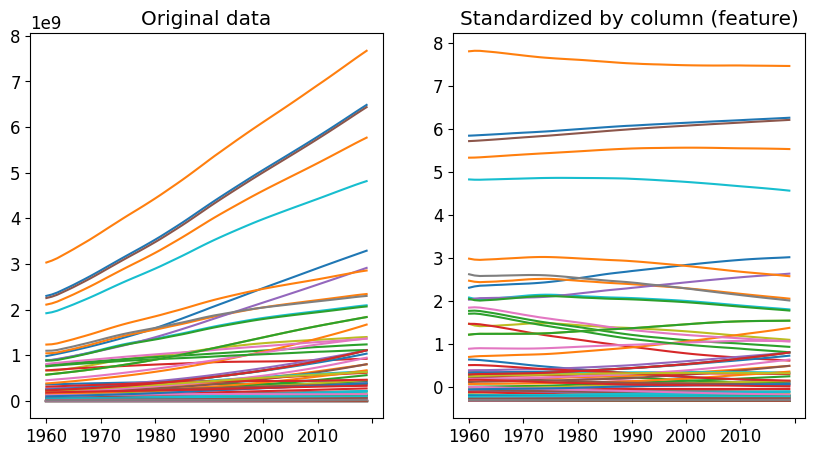

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0] = pop_df_clean.drop("cluster", axis=1).T.plot(legend=False, ax=ax[0]);
ax[0].set_title("Original data")
ax[1] = pod_standardized_bycol.T.plot(legend=False, ax=ax[1]);
ax[1].set_title("Standardized by column (feature)")

<Axes: >

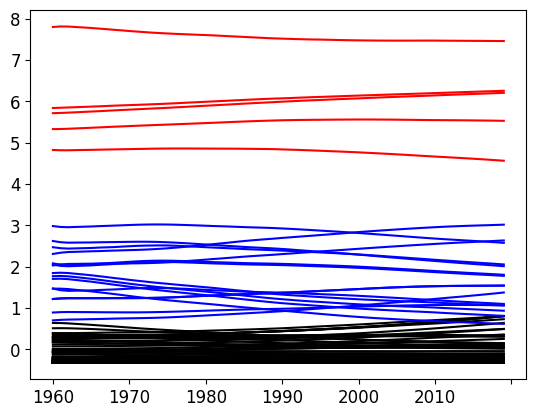

In [26]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Set random_state for reproducibility
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
pod_standardized_bycol['cluster'] = kmeans.labels_

pod_standardized_bycol.head()

ax = pod_standardized_bycol[pod_standardized_bycol.cluster == 0].drop("cluster", axis=1).T.plot(legend=False, color="k")
pod_standardized_bycol[pod_standardized_bycol.cluster == 1].drop("cluster", axis=1).T.plot(ax=ax, legend=False, color="r")
pod_standardized_bycol[pod_standardized_bycol.cluster == 2].drop("cluster", axis=1).T.plot(ax=ax, legend=False, color="b")


Figure 4: having standardized wrong the clustering is still based on the overall average population size in that country

## Scaling (standardizing) correctly!

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
20it [00:00, 64.36it/s]


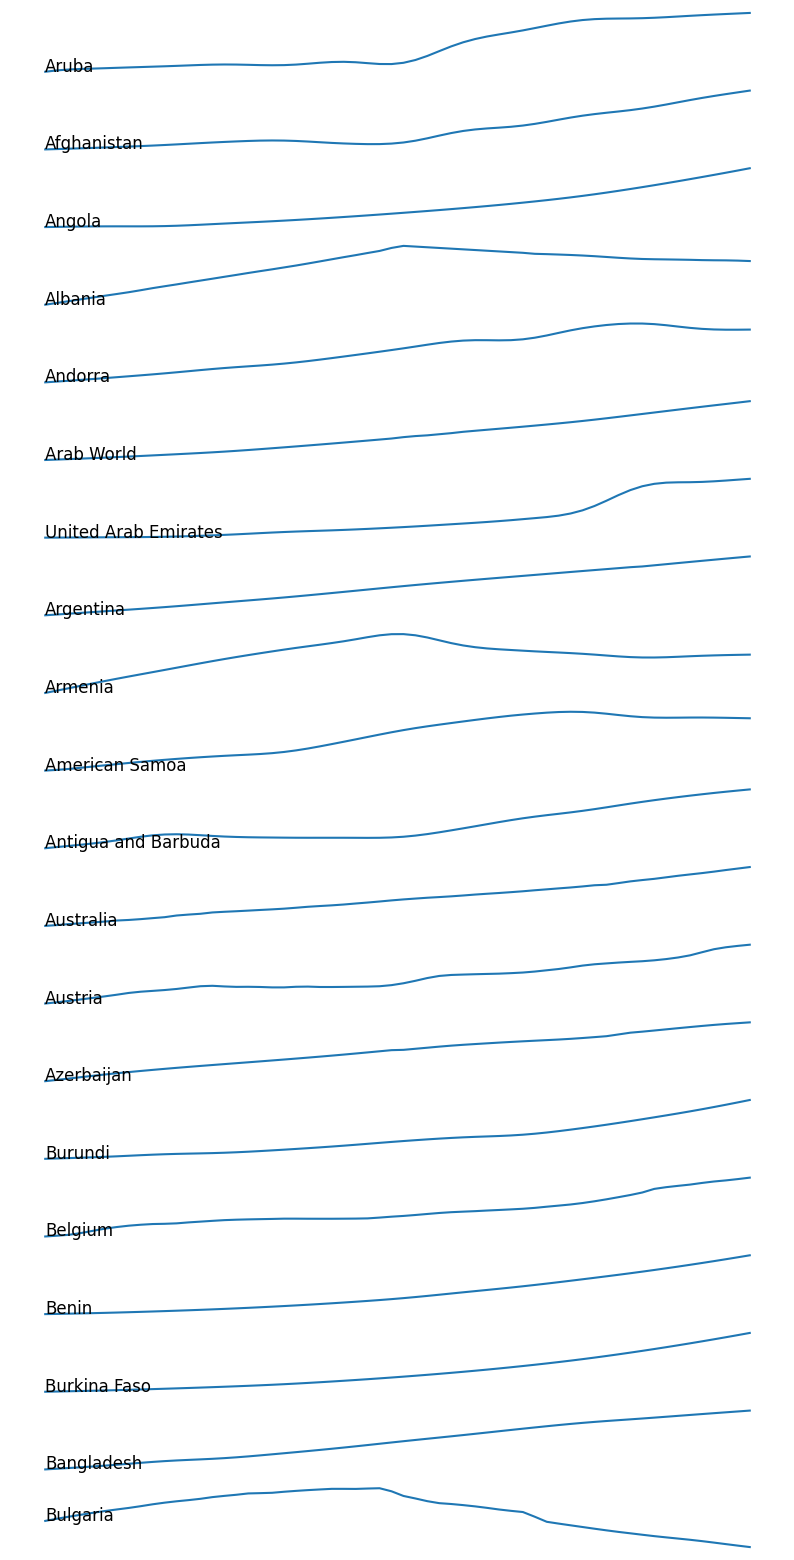

In [27]:

## Scale the data
# standardizing the data
X= pop_df_clean.drop("cluster", axis=1).values
scaled_data = preprocessing.scale(X, axis=1, with_mean = True, with_std = True)

pod_standardized_byrow = pd.DataFrame(data=scaled_data, index = pop_df_clean.index, columns=pop_df_clean.drop("cluster", axis=1).columns )

fig, ax = plt.subplots(20, 1, figsize=(10,20))
for i,idx in tqdm(enumerate(pod_standardized_byrow.index[:20])):
   pod_standardized_byrow.loc[idx].T.plot(ax=ax[i])
   ax[i].axis('off')
   ax[i].text(0, pod_standardized_byrow.loc[idx, "1960"], idx)

#pod_standardized_bycol.head()

Figure 5: in this plot the time series look again like in figure 2 because each time series has been scaled but its shape has not changed.


Text(0.5, 1.0, 'Standardized by column (time series)')

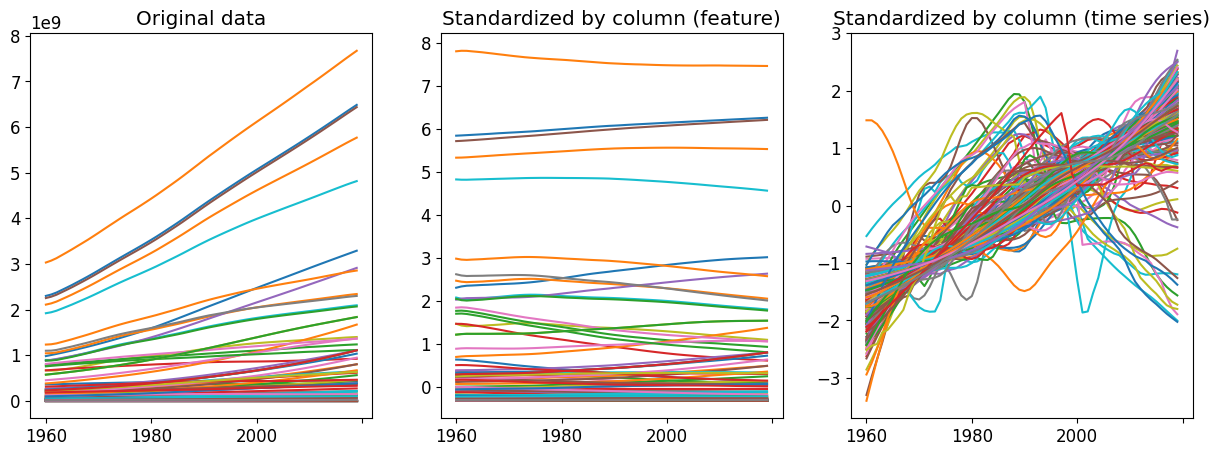

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0] = pop_df_clean.drop("cluster", axis=1).T.plot(legend=False, ax=ax[0]);
ax[0].set_title("Original data")
ax[1] = pod_standardized_bycol.drop("cluster", axis=1).T.plot(legend=False, ax=ax[1]);
ax[1].set_title("Standardized by column (feature)")
ax[2] = pod_standardized_byrow.T.plot(legend=False, ax=ax[2]);
ax[2].set_title("Standardized by column (time series)")


Figure 6: now the time series are standardized correctly! we can see difference in trends and cluster according to those

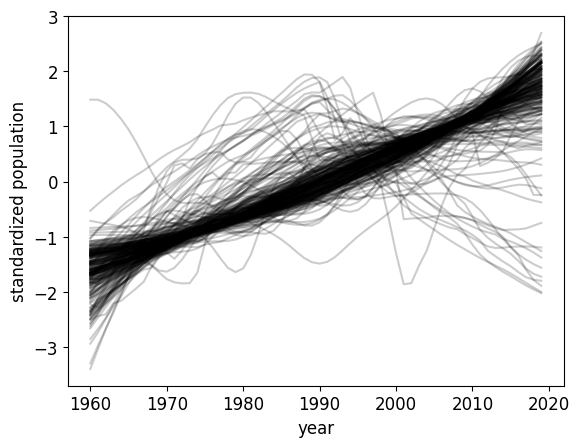

In [29]:
# looking at the data
plt.plot(pod_standardized_byrow.T, color="k", alpha=0.2)
plt.xlabel("year")
plt.ylabel("standardized population")
plt.xticks(range(0,70,10), ["%d"%i for i in range(1960, 2030, 10)]);

**Fig**. 7: These figures show changes in population by year. The image to the left shows the population (in billions) of differenct countries (each country represented by a color) from the year 1960 to 2020. The figure to the right shows the population of each year and country in standarized units. different trends are visible including near-linear growth, rise and fall, some dramatic drops at different times.

<Axes: >

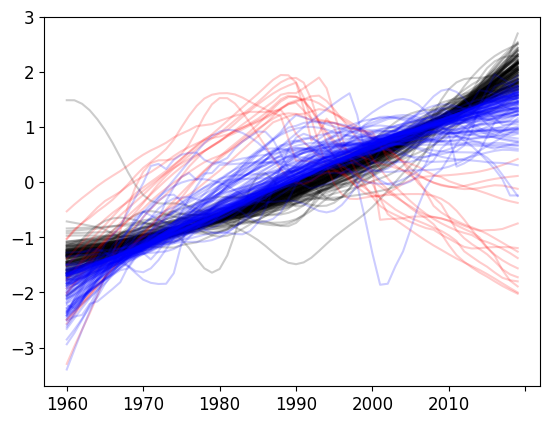

In [30]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Set random_state for reproducibility
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
pod_standardized_byrow['cluster'] = kmeans.labels_

pod_standardized_byrow.head()

ax = pod_standardized_byrow[pod_standardized_byrow.cluster == 0].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
pod_standardized_byrow[pod_standardized_byrow.cluster == 1].drop("cluster", axis=1).T.plot(ax=ax, legend=False, color="r", alpha=0.2)
pod_standardized_byrow[pod_standardized_byrow.cluster == 2].drop("cluster", axis=1).T.plot(ax=ax, legend=False, color="b", alpha=0.2)


Figure 8: Clustering the time series after correct standardization shows three distinct trends, convex grow with increasingly rapid growing in the 2000s, concave growth with decreased growth speed in the 1990s, and a subset of countries with population size dicrease after 1990.


In [ ]:
!wget https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.geojson


In [ ]:
import geopandas as gpd
countriesshp = gpd.GeoDataFrame.from_file("geoBoundariesCGAZ_ADM0.geojson")


In [ ]:
countriesshp.replace("&", "and")
countriesshp.sort_values(by="shapeName").shapeName.values

In [ ]:
count = 0
for i in pod_standardized_byrow.index:
  if not i in countriesshp.shapeName.values:
    count +=1
    print(i, count)

In [ ]:
fig,ax = pl.subplots(1,1, figsize=(10,10))

ax.set_title("Cluster 1 ")
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax.plot(pod_standardized_byrow[pod_standardized_byrow.cluster == 1 ].drop("cluster", axis=1).T);
ax.legend(labels=pod_standardized_byrow.loc[pod_standardized_byrow.cluster == 1].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')



In [ ]:
mapcluster = countriesshp.merge(pod_standardized_byrow, left_on="shapeName", right_index=True)
ax = mapcluster.plot("cluster", figsize=(20,20), legend=True,     categorical=True)
plt.axis('off')

In [ ]:
# prompt: cluster the data with dbscan

from sklearn.cluster import DBSCAN

# Assuming 'scaled_data' from the previous code contains the correctly scaled data
# Replace with your actual data if different.

# Define DBSCAN parameters
dbscan = DBSCAN(eps=3, min_samples=5) # Adjust eps and min_samples as needed

# Fit DBSCAN to the data
dbscan.fit(scaled_data)

# Get cluster labels
labels = dbscan.labels_

# Add cluster labels to the DataFrame
pod_standardized_byrow['cluster'] = labels
print(pod_standardized_byrow['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
ax = pod_standardized_byrow[pod_standardized_byrow.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(0, pod_standardized_byrow['cluster'].max()+1):
  pod_standardized_byrow[pod_standardized_byrow.cluster == l].drop("cluster", axis=1).T.plot(legend=False, alpha=0.2)
# ... plot other clusters

# Evaluate the clusters as needed
# ...


# Example of mapping the clusters with geopandas, continuing from the original notebook
# ...

# Note: the eps and min_samples parameters are crucial. You might need to tune these
# values based on your dataset to get meaningful results.




# Identifying the countries in the smallest clusters

plot the two smallest clusters with labels for the countries

In [ ]:
fig,ax = pl.subplots(1,2, figsize=(20,10))

ax[0].set_title("Cluster 1 ")
ax[0].set_xticks(range(0,70,10))
ax[0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0].plot(pod_standardized_byrow[pod_standardized_byrow.cluster == 1 ].drop("cluster", axis=1).T);
ax[0].legend(labels=pod_standardized_byrow.loc[pod_standardized_byrow.cluster == 1].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')


ax[1].set_title("Cluster -1 (outliers)")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1].plot(pod_standardized_byrow[pod_standardized_byrow.cluster == -1 ].drop("cluster", axis=1).T);
ax[1].legend(labels=pod_standardized_byrow.loc[pod_standardized_byrow.cluster == -1].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')
# placing legend method via https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/



Figure 4: This figure shows the countries that cluster together in the smallest clusters of the sample. These two clusters are include the countries that either had a decline in population or did not have population increases.

Can you do some library research to figure out why those countries may cluster together?

In both cases the inflection point was around the 1990. This year was characterized by the fall of the Soviet Union that ended up in a crisis in Eastern Europe and other socialist countries.